In [ ]:
import csv

with open('Metro_Nashville___Davidson_County_Traffic_Crashes__2017_.csv') as csvfile:
    traffic_data = list(csv.DictReader(csvfile))

In [20]:
traffic_data[0]

{'Accident Number': '20110822774',
 'City': 'NASHVILLE',
 'Collision Type': '11',
 'Collision Type Description': 'Front to Rear',
 'Date and Time': '03/29/2017 07:21:00 AM',
 'Harmful Codes': '12',
 'Harmful Codes Description': 'MOTOR VEHICLE IN TRANSPORT',
 'Hit and Run': 'N',
 'Illumination': '1',
 'Illumination Description': 'DAYLIGHT',
 'Latitude': '36.15323',
 'Longitude': '-86.76442',
 'Mapped Location': 'MM 210 7 I 40\nNASHVILLE, TN 37210\n(36.15323000000000, -86.76442000000000)',
 'Number of Fatalities': '0',
 'Number of Injuries': '0',
 'Number of Motor Vehicles': '2',
 'Precinct': 'HERMIT',
 'Property Damage': '',
 'RPA': '8202',
 'Reporting Officer': '256439',
 'State': 'TN',
 'Street Address': 'MM 210 7 I 40',
 'Weather': '21',
 'Weather Description': 'CLEAR',
 'Zip': '37210'}

In [21]:
from datetime import datetime

def get_hour(time_str):
    return datetime.strptime(time_str, '%m/%d/%Y %I:%M:%S %p').hour

In [22]:
get_hour('03/29/2017 07:21:00 PM')

19

In [23]:
hour_and_vehicles = list(map(lambda el: [get_hour(el['Date and Time']), int(el['Number of Motor Vehicles'])], traffic_data))

In [24]:
hour_and_vehicles[0]

[7, 2]

In [25]:
import pandas as pd

df = pd.DataFrame(hour_and_vehicles, columns=['Hour', 'Number of Vehicles Involved'])
by_hour = df.groupby(['Hour'], as_index=False).sum()

In [26]:
by_hour

,Hour,Number of Vehicles Involved
0,0,3822
1,1,671
2,2,593
3,3,554
4,4,449
5,5,782
6,6,2226
7,7,4294
8,8,3815
9,9,2544


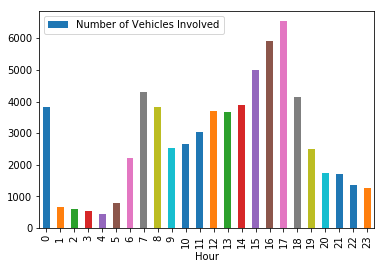

In [27]:
%matplotlib inline

by_hour.plot(kind='bar', x='Hour', y='Number of Vehicles Involved')